In [2]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.chosun.com/medical"

def get_link(url):
    html_doc = requests.get(URL).text
    soup = BeautifulSoup(html_doc, 'html.parser')
    news_list = soup.find_all('a', class_='story-card__headline')
    title_and_link = []
    link_set = set()
    for news in news_list:
        title = news.get_text(strip=True)
        link = news['href']
        # 많은 중복이 있기 때문에 link를 기준으로 중복을 제거
        if link not in link_set:
            title_and_link.append((title, link))
            link_set.add(link)

    return title_and_link

title_and_link = get_link(URL)
for title, link in title_and_link:
    print(link)


/culture-life/culture_general/2025/05/27/GJIH6NECIZHIZCW6YKDAZ56R7Q/
/medical/2025/05/27/GS65YZCIJJC6JHMYK3X2CR43IE/
/medical/2025/05/26/5NQ3TBR7SFA7LM46AXZCL2ZTSU/
/medical/2025/05/23/RDHVGNP5JNDVRDR6VSNSKY3PMQ/
/national/national_general/2025/05/27/JA3SGVNSXBF45K6THHW3NMYCRU/
/medical/2023/12/27/2LBS6EKH7ZHW7NQNBYLC445BXM/
/medical/2025/04/29/2JKOKCOSWFHBNNAUVZCFMWQXPI/
/medical/2025/04/22/MCFSYZZCJBCE7EZBN75LRZQD6Q/
/medical/2025/04/15/HA65FANI7ZBLPLHOM6MXEDG3ME/
/medical/2025/03/18/5WSVIYRNVVGX7HPZYBCRMZNIRM/
/medical/2025/04/30/W5YYOVALNNHL5HMYBVPBAGRFFI/
/medical/2025/04/04/6FUENBDWBNH6VAOGWKXTPKZVSE/
/medical/2025/04/09/5IH7IWAJBNFUJB75GFSUC4JKPM/
/medical/2025/03/27/D6KKMHHW2ZCCJLSDGOVC3MN4P4/
/medical/2025/05/22/OFFFE46FKZF7VFWSVLKGPVWF6I/
/medical/2025/05/15/MRTJ6TERNJEBBPLMNWRP6F2RVE/
/medical/2025/05/01/OBCZZVJ5E5H2TPVU52S5JCCJNE/
/medical/2025/04/24/CF6SWPX6OVFN5LZMEG3MY7OIHY/


In [4]:
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = Options()
options.add_argument("--headless=new")

def get_article(link):
    driver = webdriver.Chrome(options=options)
    driver.get(link)
    class_name = "article-body__content"
    xpath = "/html/body/div[1]/div[1]/div[2]/div/section/article/section"
    WebDriverWait(driver, 20).until(
        # lambda d: d.execute_script('return document.readyState') == 'complete'
        EC.presence_of_element_located((By.CLASS_NAME, class_name))
    )
    try:
        article_session = driver.find_element(By.XPATH, xpath)
        article_contents = article_session.find_elements(By.CLASS_NAME, class_name)
        if article_contents:
            return [c.text.strip() for c in article_contents]
    finally:
        driver.quit()

print(f"Fetching article from {len(title_and_link)} links...")
articles = []
for title, link in title_and_link:
    if not link.startswith("/medical/"):
        continue
    m = re.search(r"(/\d{4}/\d{2}/\d{2}/[^/]+)", link)
    if m:
        cut = m.group(1)
        article = get_article(URL + cut)
        articles.append(article)
    time.sleep(5)
        

Fetching article from 18 links...


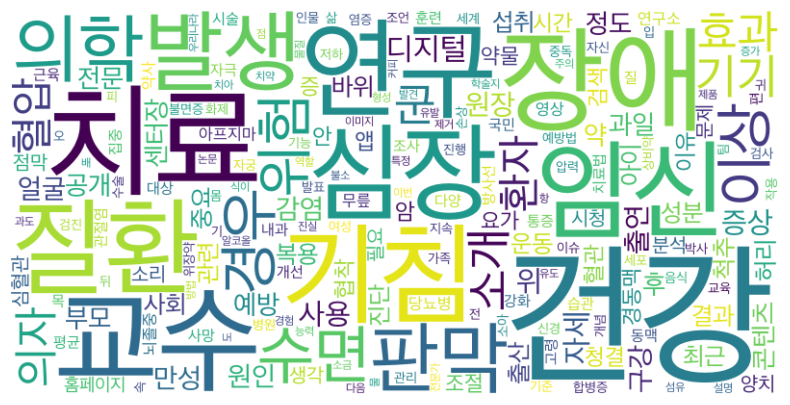

In [6]:
from kiwipiepy import Kiwi, utils
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

kiwi = Kiwi()
stopwords = utils.Stopwords()

def generate_wordcloud(articles):
    noun_counts = Counter()
    for article in articles:
        for text in article:
            tokens = kiwi.tokenize(text, stopwords=stopwords)
            for token in tokens:
                if token.tag == "NNG":
                    noun_counts[token.form] += 1
    
    # Create a WordCloud object
    wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',
                          width=800, height=400,
                          background_color='white').generate_from_frequencies(noun_counts)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(articles)
